# BTTH - Machine Learning

1. Analyze
2. Preprocess data
3. Feature Engineering
4. Build Model Pipeline
5. Measure performance of the model.
6. Which metric is your main metric for this problem and why? What is your main model as well as their params and why? Your comment

How can I measure your point:

1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. Data Analysis is correct or make sense
4. The data preprocessing is correct or make sense
5. The Feature engineering is correct or make sense
6. Model pipeline
7. Any other additional process will be considered a small plus point.


Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.


## Load Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use("seaborn-v0_8")
warnings.filterwarnings("ignore")

In [2]:
PATH = "/kaggle/input/credit-fraud/credit_fraud.csv"  # Path to your file

df = pd.read_csv(PATH, index_col=0)
df.head()
# ToDo: Show histogram of dataframe

,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


## Data Analysis


In [3]:
# Data analysis
# Todo: analyze your data here

df.info()  # Non-null dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 25134 entries, 0 to 25133
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              25134 non-null  int64  
 1   GENDER          25134 non-null  object 
 2   CAR             25134 non-null  object 
 3   REALITY         25134 non-null  object 
 4   NO_OF_CHILD     25134 non-null  int64  
 5   INCOME          25134 non-null  float64
 6   INCOME_TYPE     25134 non-null  object 
 7   EDUCATION_TYPE  25134 non-null  object 
 8   FAMILY_TYPE     25134 non-null  object 
 9   HOUSE_TYPE      25134 non-null  object 
 10  FLAG_MOBIL      25134 non-null  int64  
 11  WORK_PHONE      25134 non-null  int64  
 12  PHONE           25134 non-null  int64  
 13  E_MAIL          25134 non-null  int64  
 14  FAMILY SIZE     25134 non-null  float64
 15  BEGIN_MONTH     25134 non-null  int64  
 16  AGE             25134 non-null  int64  
 17  YEARS_EMPLOYED  25134 non-null  int6

In [4]:
# Show statistical information
df.describe()

,ID,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,2.513400e+04,25134.000000,2.513400e+04,25134.0,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
mean,5.078838e+06,0.512334,1.948339e+05,1.0,0.273812,0.292791,0.100660,2.294064,26.120594,40.536166,7.204106,0.016790
std,4.194102e+04,0.787785,1.045110e+05,0.0,0.445923,0.455052,0.300885,0.947590,16.439658,9.559474,6.414231,0.128486
min,5.008806e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,5.042228e+06,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,33.000000,3.000000,0.000000
50%,5.079004e+06,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,40.000000,5.000000,0.000000
75%,5.115604e+06,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,39.000000,48.000000,10.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,67.000000,43.000000,1.000000


Set lại type của các cột sau thành kiểu 'object'

In [5]:
for col in ["WORK_PHONE", "PHONE", "E_MAIL", "NO_OF_CHILD", 'FLAG_MOBIL']:
    df[col] = df[col].astype("object")

Chọn ra các cột thuộc categorical và numerical

In [6]:
categorical_col = list(df.select_dtypes(include=["object"]).columns)
print("Categorical columns: ", categorical_col)
numerical_col = list(df.select_dtypes(exclude=["object"]).columns)
print("Numerical columns: ", numerical_col)

Categorical columns:  ['GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE', 'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL']
Numerical columns:  ['ID', 'INCOME', 'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'TARGET']


Vẽ histogram của các cột numerical

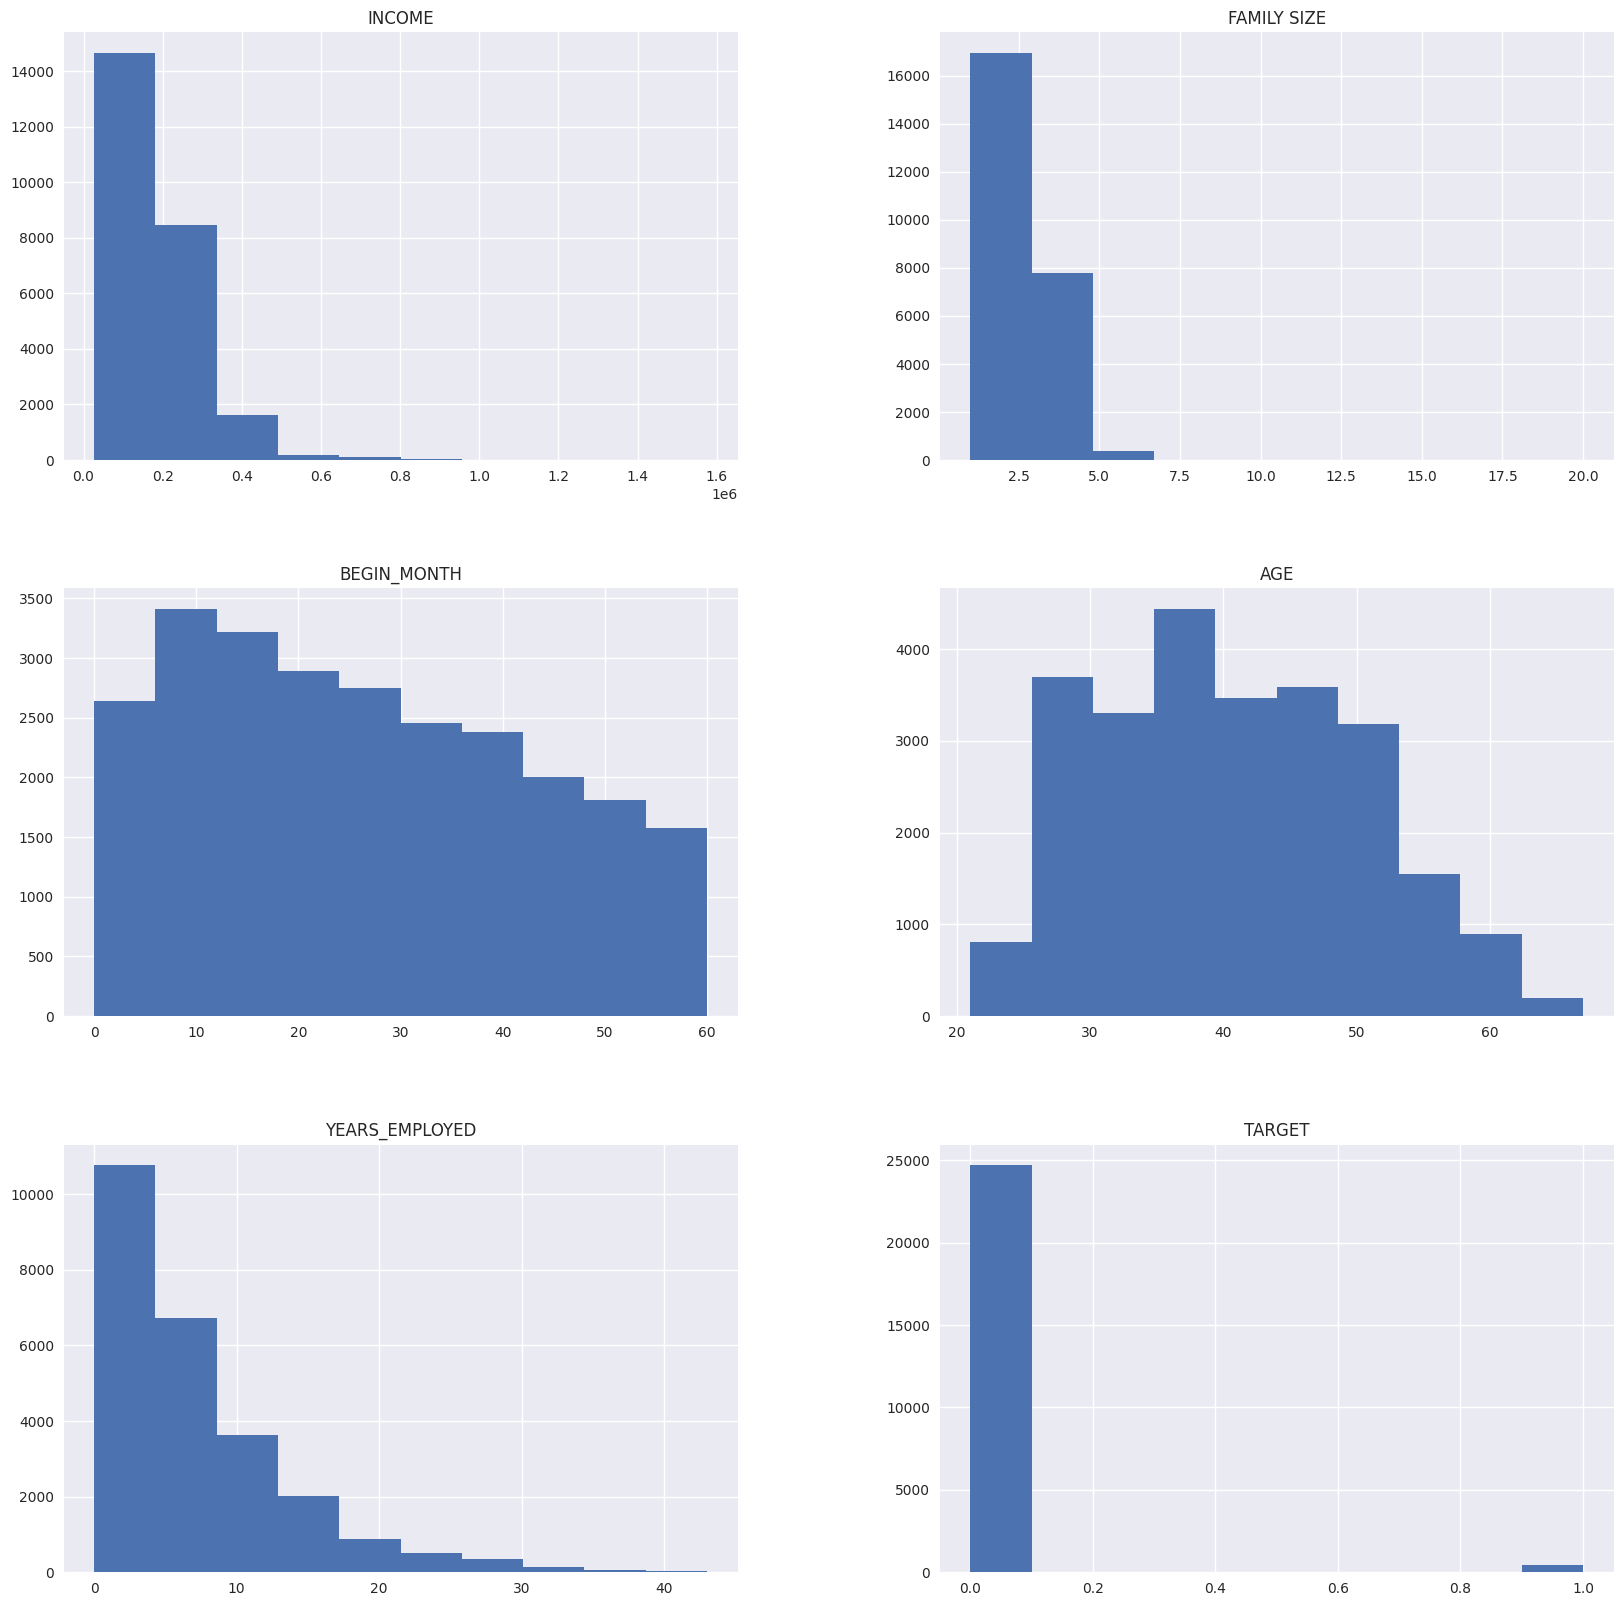

In [7]:
# Kiểm tra phân phối của dữ liệu
df[numerical_col].drop(columns=["ID"]).hist(figsize=(20, 20))
plt.show()

Dựa vào hình vẽ, ta có thể thấy cột TARGET bị lệch hẳn về phía label 0


In [8]:
len(df[df["TARGET"] == 1]) / len(df) * 100

1.6790005570144029

Chỉ có 1.68% data sample có label 1


Xuất ra các unique value của các cột categorical

In [9]:
for col in categorical_col:
    print(f"{col}: {df[col].unique()}\n")

GENDER: ['M' 'F']

CAR: ['Y' 'N']

REALITY: ['Y' 'N']

NO_OF_CHILD: [0 3 1 2 4 14 5 19 7]

INCOME_TYPE: ['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']

EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

FAMILY_TYPE: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

HOUSE_TYPE: ['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']

FLAG_MOBIL: [1]

WORK_PHONE: [0 1]

PHONE: [0 1]

E_MAIL: [0 1]



Trực quan hóa các cột categorical bằng countplot để so sánh số lượng mỗi data sample thuộc một label trên tổng thể 

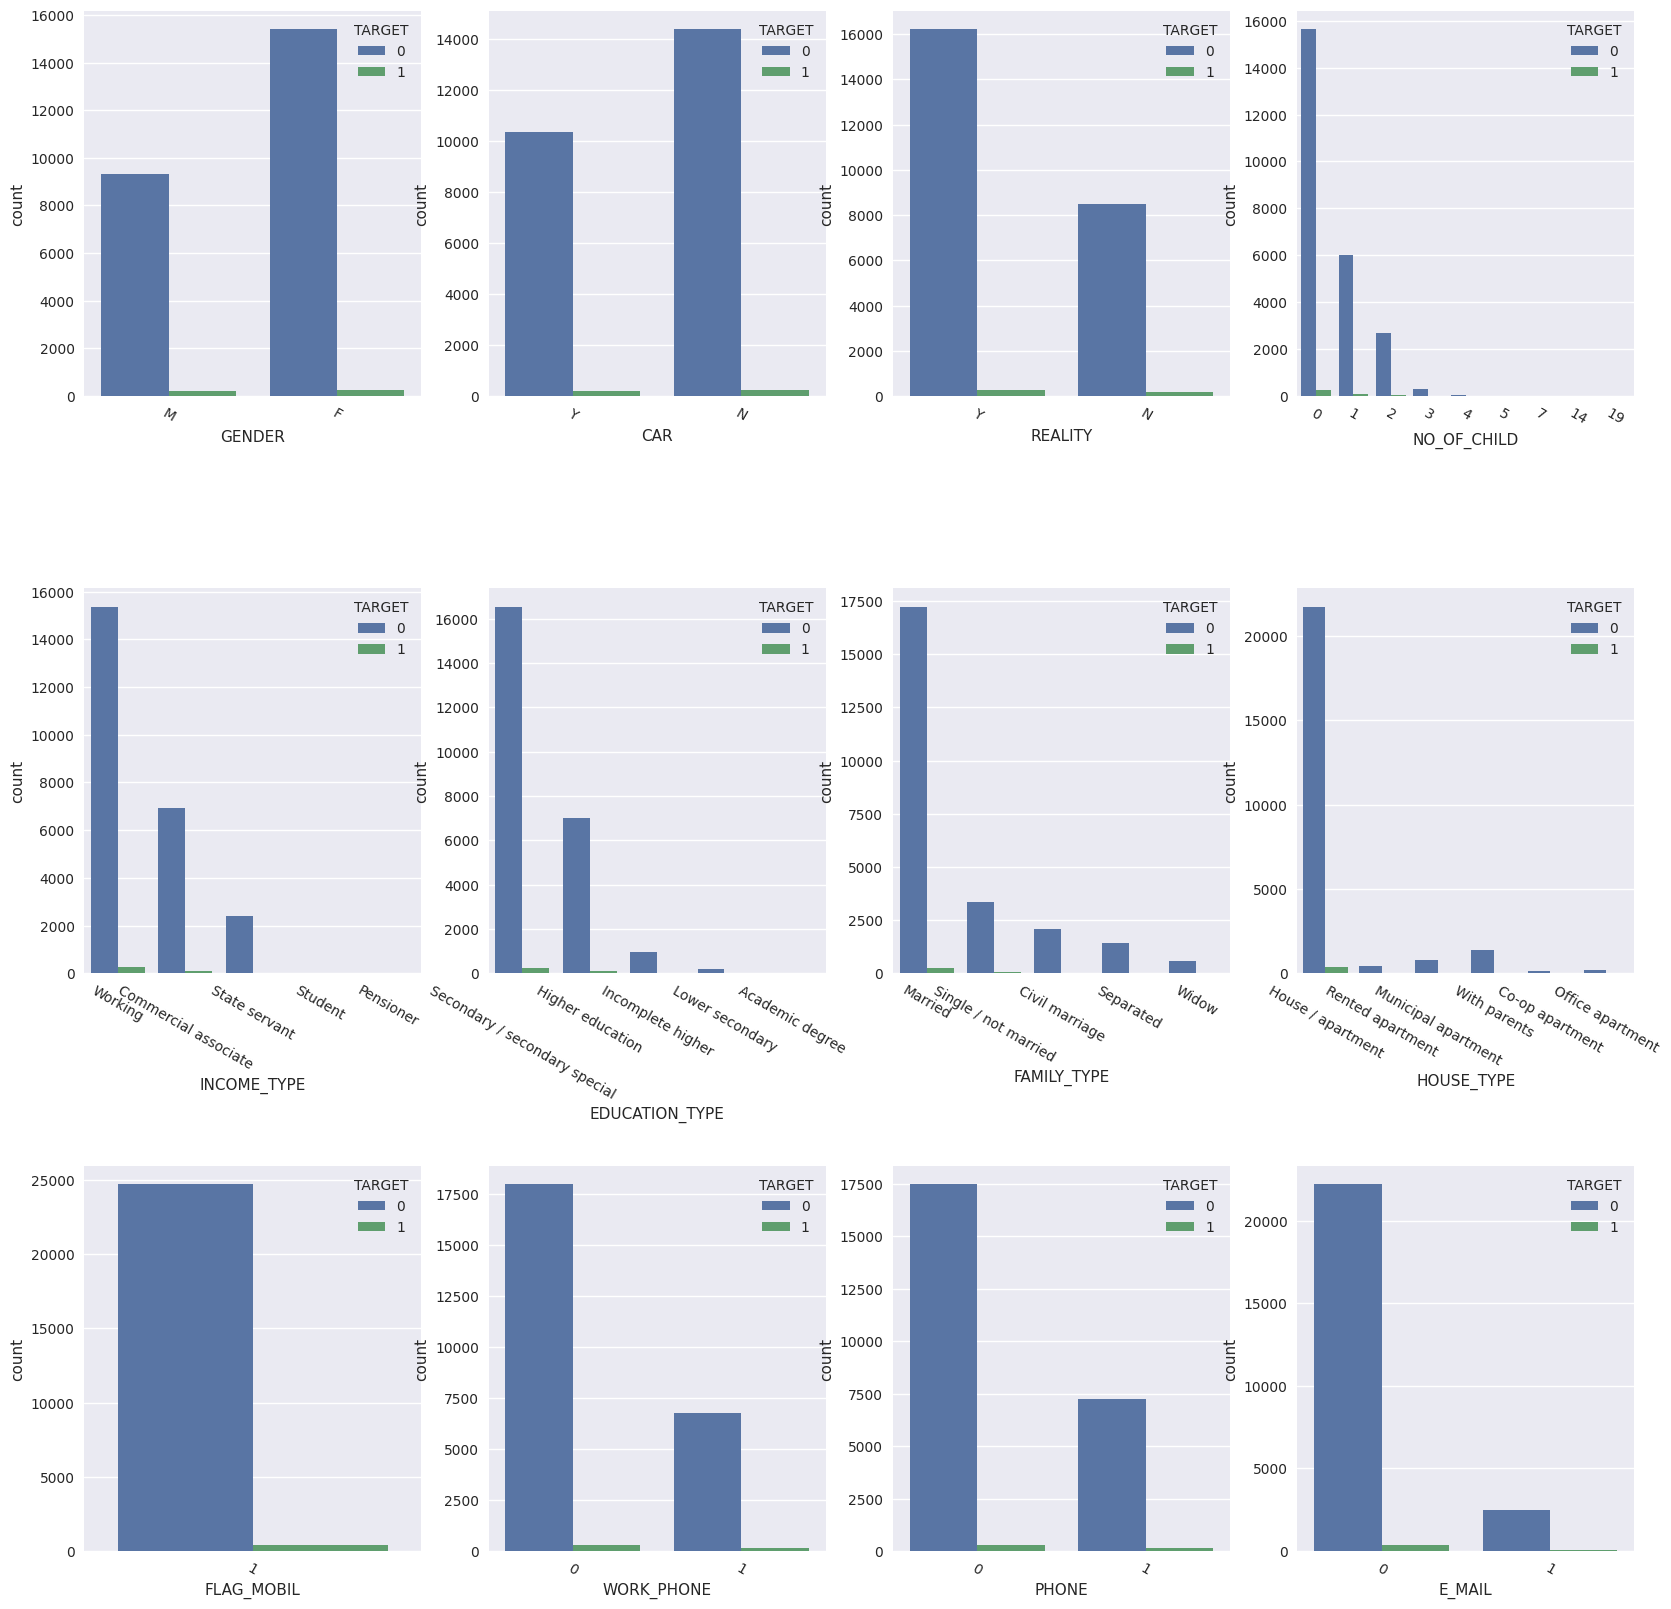

In [10]:
target = "TARGET"

fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(wspace=0.2, hspace=0.5)

for i, col in enumerate(categorical_col):
    ax = plt.subplot(3, 4, i+1)
    sns.countplot(data=df, x=col, hue=target, ax=ax)
    ax.tick_params(axis="x", labelrotation=-30)
plt.show()

Dựa vào hình vẽ ta thấy các cột của label 0 lớn hơn rất nhiều label 1

Xuất ra số liệu cụ thể

In [11]:
for col in categorical_col:
    display(pd.DataFrame(df.groupby([target, col])[col].count()))

GENDER
TARGET GENDER        
0      F        15400
       M         9312
1      F          230
       M          192

CAR
TARGET CAR       
0      N    14373
       Y    10339
1      N      245
       Y      177

REALITY
TARGET REALITY         
0      N           8494
       Y          16218
1      N            179
       Y            243

NO_OF_CHILD
TARGET NO_OF_CHILD             
0      0                  15635
       1                   6021
       2                   2675
       3                    301
       4                     56
       5                     18
       7                      2
       14                     3
       19                     1
1      0                    273
       1                     97
       2                     40
       3                     11
       4                      1

INCOME_TYPE
TARGET INCOME_TYPE                      
0      Commercial associate         6933
       State servant                2408
       Student                        10
       Working                     15361
1      Commercial associate          119
       Pensioner                      13
       State servant                  29
       Working                       261

EDUCATION_TYPE
TARGET EDUCATION_TYPE                               
0      Academic degree                            14
       Higher education                         7004
       Incomplete higher                         972
       Lower secondary                           181
       Secondary / secondary special           16541
1      Higher education                          128
       Incomplete higher                          21
       Lower secondary                             6
       Secondary / secondary special             267

FAMILY_TYPE
TARGET FAMILY_TYPE                      
0      Civil marriage               2101
       Married                     17232
       Separated                    1452
       Single / not married         3362
       Widow                         565
1      Civil marriage                 32
       Married                       277
       Separated                      15
       Single / not married           83
       Widow                          15

HOUSE_TYPE
TARGET HOUSE_TYPE                     
0      Co-op apartment             149
       House / apartment         21738
       Municipal apartment         793
       Office apartment            194
       Rented apartment            433
       With parents               1405
1      Co-op apartment               3
       House / apartment           364
       Municipal apartment          19
       Office apartment              5
       Rented apartment              6
       With parents                 25

,,FLAG_MOBIL
TARGET,FLAG_MOBIL,
0,1,24712
1,1,422


WORK_PHONE
TARGET WORK_PHONE            
0      0                17954
       1                 6758
1      0                  298
       1                  124

PHONE
TARGET PHONE       
0      0      17481
       1       7231
1      0        294
       1        128

E_MAIL
TARGET E_MAIL        
0      0        22225
       1         2487
1      0          379
       1           43

Drop đi cell ở cột 'NO_OF_CHILD' có giá trị bằng 19 vì đây là outlier

In [12]:
df.drop(index=df[df["NO_OF_CHILD"] == 19].index, inplace=True)

## Feature Creation


Ở phần này ta tiến hành thêm các feature từ các feature hiện có

In [13]:
df.head()

,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [14]:
def season(month):
    month = month % 12
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    return "Winter"


df["SEASON"] = df["BEGIN_MONTH"].apply(season)
df.head()

,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET,SEASON
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0,Spring
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0,Spring
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0,Winter
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0,Winter
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0,Winter


In [15]:
df["BEGIN_YEARS"] = 2024 - df["BEGIN_MONTH"] // 12
df.head()

,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,...,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET,SEASON,BEGIN_YEARS
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,2.0,29,59,3,0,Spring,2022
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,1.0,4,52,8,0,Spring,2024
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,1.0,26,52,8,0,Winter,2022
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,1.0,26,52,8,0,Winter,2022
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,1.0,38,52,8,0,Winter,2021


In [16]:
def encode_age(age):
    if age < 18:
        return "Child"
    elif age < 59:
        return "Adult"
    else:
        return "Senior"


df["ENCODE_AGE"] = df["AGE"].apply(encode_age)
df.head()

,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,...,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET,SEASON,BEGIN_YEARS,ENCODE_AGE
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,2.0,29,59,3,0,Spring,2022,Senior
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,1.0,4,52,8,0,Spring,2024,Adult
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,1.0,26,52,8,0,Winter,2022,Adult
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,1.0,26,52,8,0,Winter,2022,Adult
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1,1.0,38,52,8,0,Winter,2021,Adult


In [17]:
def income_per_child(row):
    if row["NO_OF_CHILD"] == 0:
        return 0  # Hoặc giá trị mặc định khác tùy thuộc vào yêu cầu của bạn
    else:
        return row["INCOME"] / row["NO_OF_CHILD"]


df["INCOME_PER_CHILD"] = df.apply(income_per_child, axis=1)
df.head()

,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,...,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET,SEASON,BEGIN_YEARS,ENCODE_AGE,INCOME_PER_CHILD
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,2.0,29,59,3,0,Spring,2022,Senior,0.0
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1.0,4,52,8,0,Spring,2024,Adult,0.0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1.0,26,52,8,0,Winter,2022,Adult,0.0
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1.0,26,52,8,0,Winter,2022,Adult,0.0
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,1.0,38,52,8,0,Winter,2021,Adult,0.0


Check lại data lần nữa trước khi qua phần tiếp theo

In [18]:
df.isna().sum()

ID                  0
GENDER              0
CAR                 0
REALITY             0
NO_OF_CHILD         0
INCOME              0
INCOME_TYPE         0
EDUCATION_TYPE      0
FAMILY_TYPE         0
HOUSE_TYPE          0
FLAG_MOBIL          0
WORK_PHONE          0
PHONE               0
E_MAIL              0
FAMILY SIZE         0
BEGIN_MONTH         0
AGE                 0
YEARS_EMPLOYED      0
TARGET              0
SEASON              0
BEGIN_YEARS         0
ENCODE_AGE          0
INCOME_PER_CHILD    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25133 entries, 0 to 25133
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                25133 non-null  int64  
 1   GENDER            25133 non-null  object 
 2   CAR               25133 non-null  object 
 3   REALITY           25133 non-null  object 
 4   NO_OF_CHILD       25133 non-null  object 
 5   INCOME            25133 non-null  float64
 6   INCOME_TYPE       25133 non-null  object 
 7   EDUCATION_TYPE    25133 non-null  object 
 8   FAMILY_TYPE       25133 non-null  object 
 9   HOUSE_TYPE        25133 non-null  object 
 10  FLAG_MOBIL        25133 non-null  object 
 11  WORK_PHONE        25133 non-null  object 
 12  PHONE             25133 non-null  object 
 13  E_MAIL            25133 non-null  object 
 14  FAMILY SIZE       25133 non-null  float64
 15  BEGIN_MONTH       25133 non-null  int64  
 16  AGE               25133 non-null  int64  
 17

## Preprocessing


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
target = df["TARGET"]
data = df.drop(columns=["ID", "TARGET", "FLAG_MOBIL"])

In [22]:
categorical_col = list(data.select_dtypes(include=["object"]).columns)
print("Categorical columns: ", categorical_col)
numerical_col = list(data.select_dtypes(exclude=["object"]).columns)
print("Numerical columns: ", numerical_col)

Categorical columns:  ['GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'SEASON', 'ENCODE_AGE']
Numerical columns:  ['INCOME', 'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'BEGIN_YEARS', 'INCOME_PER_CHILD']


Dummy các cột categorical

In [23]:
data = pd.get_dummies(data, columns=categorical_col, drop_first=True, dtype=int)
data.head()

,INCOME,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,BEGIN_YEARS,INCOME_PER_CHILD,GENDER_M,CAR_Y,REALITY_Y,...,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents,WORK_PHONE_1,PHONE_1,E_MAIL_1,SEASON_Spring,SEASON_Summer,SEASON_Winter,ENCODE_AGE_Senior
0,112500.0,2.0,29,59,3,2022,0.0,1,1,1,...,0,0,0,0,0,0,1,0,0,1
1,270000.0,1.0,4,52,8,2024,0.0,0,0,1,...,0,0,0,0,1,1,1,0,0,0
2,270000.0,1.0,26,52,8,2022,0.0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
3,270000.0,1.0,26,52,8,2022,0.0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
4,270000.0,1.0,38,52,8,2021,0.0,0,0,1,...,0,0,0,0,1,1,0,0,1,0


Chuẩn hóa dữ liệu

In [24]:
# Standard Scaler data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

Xác định outlier bằng trực quan hóa

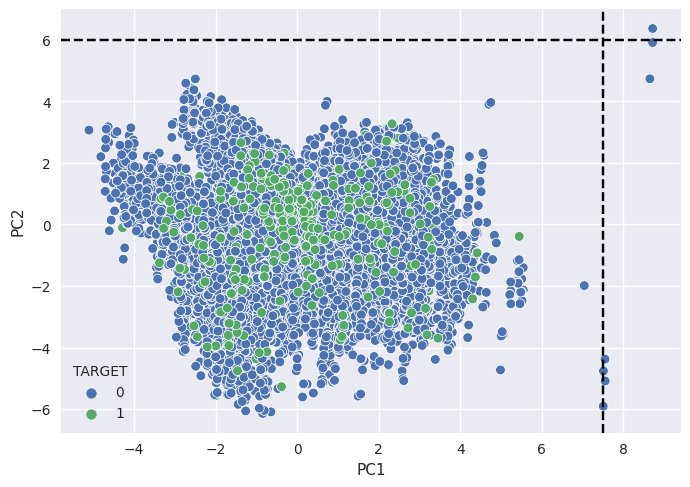

In [25]:
# Detect outlier by visulizing data
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=target)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axvline(x=7.5, color="black", linestyle="--")
plt.axhline(y=6, color="black", linestyle="--")
plt.show()

Dựa vào hình vẽ, ta sẽ loại bỏ các data sample có PC1 lớn hơn 7.5

In [26]:
outlier_indexes = np.where(pca_data[:, 0] > 7.5)[0]
print(outlier_indexes)

[ 9938  9939  9940 23432 23433 23434 23435 23436 23437 23438 23439]


In [27]:
print(f"Shape of data before removing outliers: {scaled_data.shape}")
print(f"Shape of target before removing outliers: {target.shape}")

cleaned_data = pd.DataFrame(scaled_data, columns=data.columns).drop(
    outlier_indexes, errors="ignore"
)
target = target.drop(outlier_indexes, errors="ignore")

print(f"Shape of data after removing outliers: {cleaned_data.shape}")
print(f"Shape of target after removing outliers: {target.shape}")

Shape of data before removing outliers: (25133, 41)
Shape of target before removing outliers: (25133,)
Shape of data after removing outliers: (25122, 41)
Shape of target after removing outliers: (25122,)


## Feature Engineering


In [28]:
data = pd.DataFrame(cleaned_data, columns=data.columns)
df = pd.concat([data, target], axis=1)
df.head()

,INCOME,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,BEGIN_YEARS,INCOME_PER_CHILD,GENDER_M,CAR_Y,REALITY_Y,...,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents,WORK_PHONE_1,PHONE_1,E_MAIL_1,SEASON_Spring,SEASON_Summer,SEASON_Winter,ENCODE_AGE_Senior,TARGET
0,-0.787842,-0.311758,0.175105,1.931472,-0.655449,-0.198146,-0.577418,1.282367,1.178973,0.725888,...,-0.133333,-0.245621,-0.614003,-0.643391,-0.334562,1.670740,-0.57464,-0.583032,5.231330,0.0
1,0.719195,-1.374475,-1.345658,1.199197,0.124069,1.257781,-0.577418,-0.779808,-0.848196,0.725888,...,-0.133333,-0.245621,-0.614003,1.554264,2.988978,1.670740,-0.57464,-0.583032,-0.191156,0.0
2,0.719195,-1.374475,-0.007387,1.199197,0.124069,-0.198146,-0.577418,-0.779808,-0.848196,0.725888,...,-0.133333,-0.245621,-0.614003,1.554264,2.988978,-0.598537,-0.57464,1.715171,-0.191156,0.0
3,0.719195,-1.374475,-0.007387,1.199197,0.124069,-0.198146,-0.577418,-0.779808,-0.848196,0.725888,...,-0.133333,-0.245621,-0.614003,1.554264,2.988978,-0.598537,-0.57464,1.715171,-0.191156,0.0
4,0.719195,-1.374475,0.722579,1.199197,0.124069,-0.926109,-0.577418,-0.779808,-0.848196,0.725888,...,-0.133333,-0.245621,-0.614003,1.554264,2.988978,-0.598537,-0.57464,1.715171,-0.191156,0.0


Xuất ra heatmap của correlation của dữ liệu (chỉ các cột là numerical)

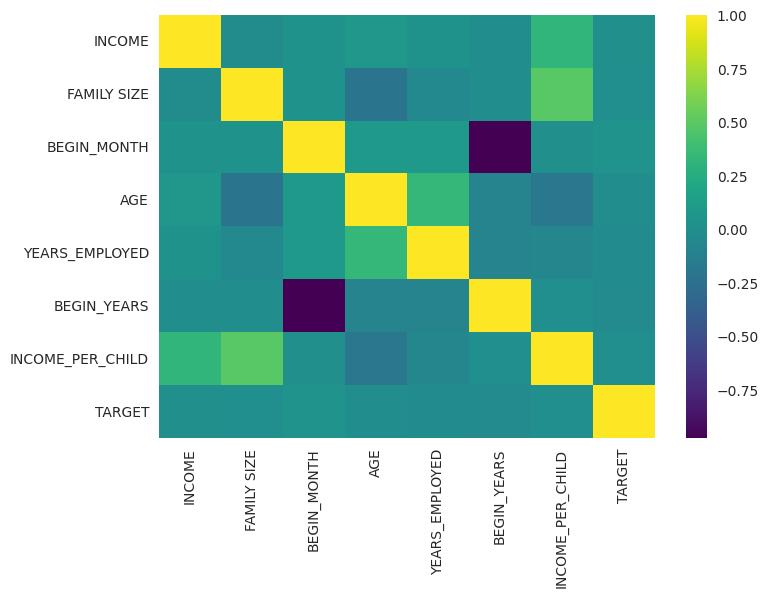

In [29]:
# Heatmap
corr_col = numerical_col.copy()
corr_col.append('TARGET')
sns.heatmap(df[corr_col].corr(), cmap="viridis")
plt.show()

Sử dụng PCA để xuất ra explained_variance_ratio. Từ đó, giúp xác định việc bỏ đi bao nhiêu chiều là hợp lí

In [30]:
pca = PCA(n_components=len(df.columns) - 1)
pca_result = pca.fit_transform(data)

print(np.round(pca.explained_variance_ratio_ * 100, decimals=4))

[7.0317e+00 5.8089e+00 5.3205e+00 4.9347e+00 4.2533e+00 4.0395e+00
 3.7800e+00 3.5879e+00 3.3949e+00 3.3529e+00 3.1908e+00 2.8551e+00
 2.6982e+00 2.6772e+00 2.6281e+00 2.5845e+00 2.5771e+00 2.5454e+00
 2.5259e+00 2.5119e+00 2.5065e+00 2.4770e+00 2.4683e+00 2.4546e+00
 2.3661e+00 2.2999e+00 2.1378e+00 2.1100e+00 1.8429e+00 1.5677e+00
 1.4380e+00 1.3109e+00 1.0888e+00 8.1790e-01 4.8750e-01 2.5210e-01
 6.6700e-02 3.0000e-03 2.9000e-03 2.8000e-03 0.0000e+00]


Ở đây ta sẽ quyết định giữ lại 98% thông tin nên số chiều còn lại chỉ là 33

In [31]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
threshold = 0.98

n_components = np.argmax(explained_variance_ratio >= threshold) + 1
print(f"Number of components to explain {threshold * 100}% variance: {n_components}")

Number of components to explain 98.0% variance: 33


In [32]:
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)

# Apply machine learning model


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN

Tiến hành xây dựng pipeline để training dữ liệu

### SVM

In [34]:
RANDOM_STATE = 21110308
TRAIN_SIZE = 0.8
N_SPLITS = 5

X = reduced_data
y = target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE
)

svm_pipeline = Pipeline(
    [
        ("smote", SMOTEENN(random_state=RANDOM_STATE)),
        ("svc", SVC(random_state=RANDOM_STATE)),
    ]
)


svm_param_grid = {
    "svc__C": [0.1, 1, 10, 100],
    "svc__gamma": ["scale", 0.001, 0.005],
    "smote__sampling_strategy": [0.5, 0.25, 0.15, 0],
}

svm_grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=svm_param_grid,
    cv=N_SPLITS,
    n_jobs=-1,
    scoring="f1",
    verbose=1,
)
svm_grid_search.fit(X_train, y_train)

print("Best parameters:", svm_grid_search.best_params_)
print("Best score: ", svm_grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'smote__sampling_strategy': 0.15, 'svc__C': 1, 'svc__gamma': 'scale'}
Best score:  0.15935352503058176


Do GridSearchCV đã lưu lại thông số của model tốt nhất nên ta lấy trực tiếp Grid Search vừa train đi predicting 

In [35]:
preds = svm_grid_search.predict(X_test)

print(classification_report(y_test, preds))
print(f'Accuracy Score: {accuracy_score(y_test, preds)}')
print(f'Precision Score: {precision_score(y_test, preds)}')
print(f'Recall Score: {recall_score(y_test, preds)}')
print(f'F1 Score: {f1_score(y_test, preds)}')

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4933
           1       0.32      0.13      0.19        92

    accuracy                           0.98      5025
   macro avg       0.65      0.56      0.59      5025
weighted avg       0.97      0.98      0.97      5025

Accuracy Score: 0.9791044776119403
Precision Score: 0.32432432432432434
Recall Score: 0.13043478260869565
F1 Score: 0.18604651162790697


Tiến hành xuất Confusion matrix

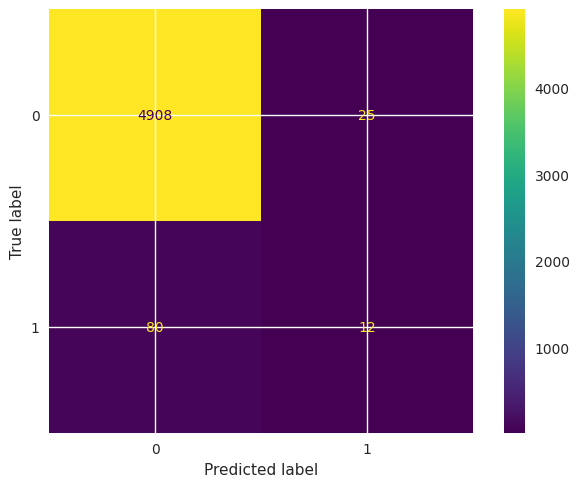

In [36]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, preds), 
                       display_labels=svm_grid_search.classes_).plot()

### Tương tự với MLP

In [37]:
mlp_pipeline = Pipeline([
    ('smote', SMOTEENN(random_state=RANDOM_STATE)),
    ('mlp', MLPClassifier(random_state=RANDOM_STATE))
])


mlp_param_grid = {
    'mlp__hidden_layer_sizes': [(100,), (200,)],
    'mlp__activation': ['relu', 'logistic'],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__max_iter': [500, 800],
    'smote__sampling_strategy': [0, 0.15, 0.25, 0.5],
}

mlp_grid_search = GridSearchCV(
    estimator=mlp_pipeline,
    param_grid=mlp_param_grid,
    cv=N_SPLITS,
    n_jobs=-1,
    scoring="f1",
    verbose=1,
)
mlp_grid_search.fit(X_train, y_train)

print("Best parameters:", mlp_grid_search.best_params_)
print("Best score: ", mlp_grid_search.best_score_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (200,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 500, 'smote__sampling_strategy': 0.15}
Best score:  0.17759669481293344


In [38]:
preds = mlp_grid_search.predict(X_test)

print(classification_report(y_test, preds))
print(f'Accuracy Score: {accuracy_score(y_test, preds)}')
print(f'Precision Score: {precision_score(y_test, preds)}')
print(f'Recall Score: {recall_score(y_test, preds)}')
print(f'F1 Score: {f1_score(y_test, preds)}')

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4933
           1       0.17      0.20      0.18        92

    accuracy                           0.97      5025
   macro avg       0.58      0.59      0.58      5025
weighted avg       0.97      0.97      0.97      5025

Accuracy Score: 0.9681592039800995
Precision Score: 0.17307692307692307
Recall Score: 0.1956521739130435
F1 Score: 0.18367346938775508


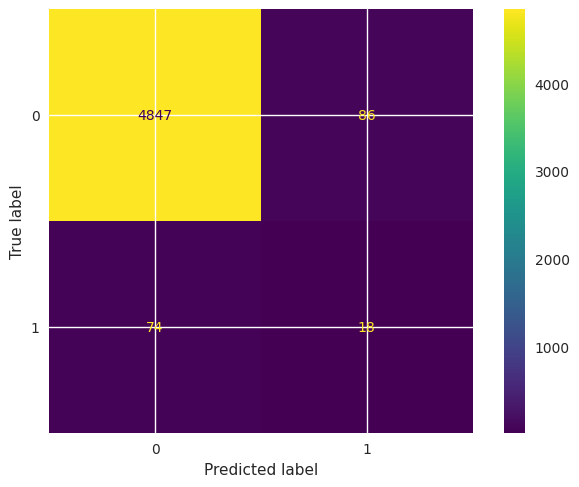

In [39]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, preds), 
                       display_labels=mlp_grid_search.classes_).plot()

## Conclusion

Dựa vào quá trình analysis, ta có thể nhận ra dữ liệu bị lệch rất nặng về phía label 0 (lệch hơn 98%). Thế nên việc mô hình huấn luyện của chúng ta đạt độ chính xác cao là một thách thức quá lớn.

Do đó, em đã tiến hành Over Sampling bằng SMOTEENN, thêm vào các đặc trưng mới nhằm giúp phân biệt tốt hơn giữa hai lớp.

Về phần SMOTEENN, đây là thụât toán kết hợp giữa SMOTE (Synthetic Minority Over-sampling Technique) và ENN (Edited Nearest Neighbors). Quy trình bao gồm:

1. SMOTE: tăng cường các mẫu của lớp thiểu số (trong bài lớp thiểu số tăng cường đến 15% tổng thể là tốt nhất, tìm được thông qua GridSearch)

2. ENN: Loại bỏ các mẫu gây nhiễu, kể cả mẫu thiểu số lẫn đa số, để làm sạch dữ liệu

Về phần main metric, em chọn F1-Score (Cả GridSearchCV và Predictions). F1-Score là thước đo lường cực kỳ hiệu quả đối với trường hợp dữ liệu bị mất cân bằng như dữ liệu của chúng ta. Xét riêng về trong trường hợp thực tế của dữ liệu thì việc Recall cao hơn là ưu tiên (giúp giảm thiểu rủi ro tài chính do gian lận không bị phát hiện) tuy nhiên việc Precision cao vẫn rất quan trọng (giảm thiểu số lượng báo động sai gây phiền toái cho người dùng). Đó là tất cả lí do em chọn F1-Score là main metric của bài.

Cũng từ ý bên trên, giữa hai mô hình SVM và MLP, em sẽ ưu tiên chọn MLP,

với các params tối ưu như: 
<pre>{
    'mlp__activation': 'relu', 
    'mlp__alpha': 0.001, 
    'mlp__hidden_layer_sizes': (200,), 
    'mlp__learning_rate': 'constant', 
    'mlp__max_iter': 500
}</pre>
 

, hơn vì cả hai F1-Score khá tương đồng nhưng Recall của MLP nhỉn hơn tương đối.